Test finite temperature lanczos code.

In [2]:
include("package.jl")
include("kagome_setup.jl")
include("KH_hamiltonian.jl")
include("ED_Thermal.jl")
include("Full_Orthogonalization_Lanczos.jl")
include("Kagome-FTLM.jl")
println("Finish loading functions!")

Finish loading packages!
Finish loading functions!


In [3]:
θ = 0.2
J = cospi(θ) * ones(3)
K = sinpi(θ) * ones(3)

la = Lattice(2,2)
N = sitenum(la)
dim = dimension(la)

Hk = Kitaev(K, la)
Hh = Heisenberg(J, la)
Htot = Hk + Hh;

println("Finish setting Hamiltonian!")

Finish setting Hamiltonian!


In [4]:
# Full ED
Hdense  = Array(Htot)
e,x = eigen(Hdense)
println("Finish diagonalizing K-H model!")

Finish diagonalizing K-H model!


In [5]:
V, fac = FTLM(Htot, M = 90, R = 50)
println("Finish FTLM!")

Finish FTLM!


In [6]:
""" ED Thermaldynamic quanties"""
step = 100
temp = [10^x for x in LinRange(-4,2,step)]
Z = zeros(step)
E = zeros(step)
C = zeros(step)
S = zeros(step)

#println(Z)
for i = 1: step
    t = temp[i]
    Z[i] += partitian(t, e)
    E[i] += energy(t,e)
    C[i] += specific_heat(t,e)
    S[i] += E[i]/t +log(Z[i])
    #S[i] += log(Z[i])
end

println("ed: Finish calculate Thermaldynamic quanties!")

ed: Finish calculate Thermaldynamic quanties!


In [7]:
""" Thermaldynamic quanties"""
step = 100
temp = [10^x for x in LinRange(-4,2,step)]
Zt = zeros(step)
Et = zeros(step)
Ct = zeros(step)
St = zeros(step)

for i = 1: step
    t = temp[i]
    Zt[i] = FTLM_partition(V, fac, t)
    Et[i], Ct[i] = FTLM_EandC(V, fac, t)
    St[i] = Et[i]/t + log(Zt[i])
end

println("ftlm: Finish calculate Thermaldynamic quanties!")

ftlm: Finish calculate Thermaldynamic quanties!


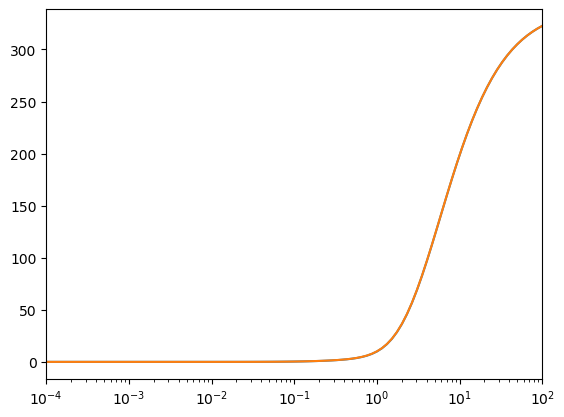

(0.00010000000000000002, 100)

In [8]:
semilogx(temp, Z/N)
semilogx(temp, Zt/N)
xlim(10^-4, 10^2)

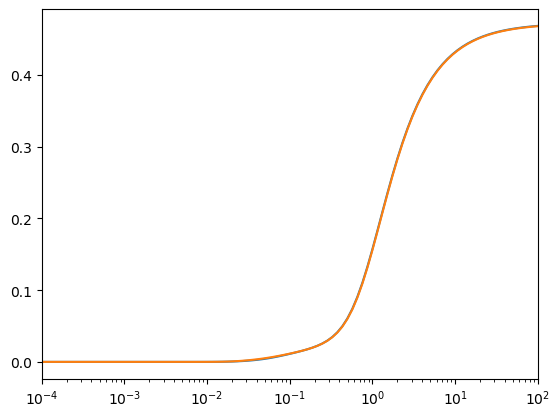

(0.00010000000000000002, 100)

In [9]:
semilogx(temp, E/N)
semilogx(temp, Et/N)
xlim(10^-4, 10^2)

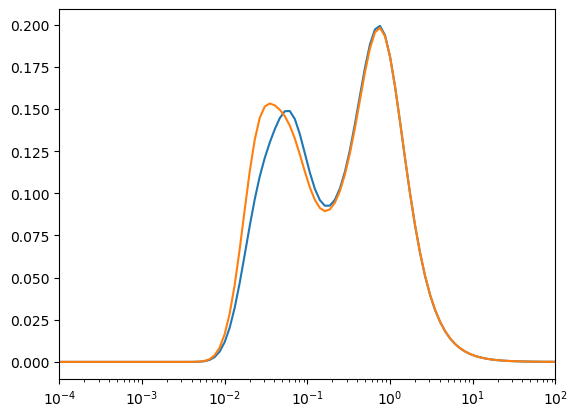

(0.00010000000000000002, 100)

In [10]:
semilogx(temp, C/N)
semilogx(temp, Ct/N)
xlim(10^-4, 10^2)

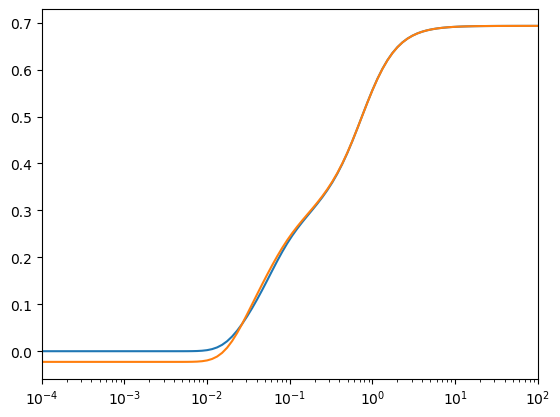

(0.00010000000000000002, 100)

In [11]:
semilogx(temp, S/N)
semilogx(temp, St/N)
xlim(10^-4, 10^2)